In [2]:
import numpy as np
import h5py
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
f = h5py.File('../data/lsr-1-rslice-0.m12f-res7100-md-sliced-gcat-dr2.hdf5','r')

In [9]:
names = {'ra':f['ra'],'dec':f['dec'],'parallax':f['parallax'],'parallax_error':f['parallax_error'],'P/error':f['parallax_over_error'],'pmra':f['pmra'],
         'pmdec':f['pmdec'],'radial_velocity':f['radial_velocity']}
df = pd.DataFrame(names)
nearby = df[df['P/error']>=5]
nearby

,ra,dec,parallax,parallax_error,P/error,pmra,pmdec,radial_velocity
0,89.808268,32.282817,1.595717,0.307908,5.182456,-0.406733,3.834471,NaN
1,87.216960,23.814907,1.385412,0.211459,6.551673,-1.986280,4.330750,NaN
2,91.903376,32.507320,0.920700,0.183049,5.029805,-0.964534,0.908005,NaN
5,93.891830,20.506996,0.989456,0.047623,20.776779,-0.329247,2.405008,NaN
8,90.989897,29.843153,1.004754,0.045845,21.916142,-0.401762,0.890302,NaN
12,76.133476,28.069812,0.994525,0.048452,20.526012,1.615686,1.597969,NaN
13,85.714706,17.550970,1.505935,0.048604,30.984058,-0.753822,5.873707,NaN
17,100.444436,37.383719,1.609210,0.043054,37.376850,-1.239647,3.649500,35.269694
18,82.861740,25.475000,1.253965,0.043634,28.738543,2.086193,2.494113,20.685866
20,83.858699,22.171863,1.559440,0.156072,9.991793,0.699362,3.172841,NaN


In [10]:
###   putting each data frame column into a list   ###
ra = np.array(nearby['ra'])
dec = np.array(nearby['dec'])
parallax = np.array(nearby['parallax'])
pmra = np.array(nearby['pmra'])
pmdec = np.array(nearby['pmdec'])
d = 1/parallax
rad_vel = np.array(nearby['radial_velocity'])

In [11]:
######################################################################################################################
####################             T matrix for galactic transformation from equatorial         ########################
###########################       values used are coordinates of gcn for current epoch         #######################
######################################################################################################################

# Change to radians here and in box below
gctheta = np.radians(122.932)
decn = np.radians(27.1283)
alphan = np.radians(192.85950)
t_1 = np.array(   [[np.cos(gctheta), np.sin(gctheta), 0] , [np.sin(gctheta),-np.cos(gctheta),0] , [0,0,1]]   )
t_2 = np.array(   [[-np.sin(decn), 0, np.cos(decn)], [0,1,0] , [np.cos(decn),0,np.sin(decn)]]   )
t_3 = np.array(   [[np.cos(alphan), np.sin(alphan), 0], [-np.sin(alphan),np.cos(alphan),0],[0,0,1]]   )
t_12 = np.matmul(t_1,t_2)
TT = np.matmul(t_12,t_3)

In [12]:
##############################################################################################################
#########                Transformation matrices multiplied AA and =                  ########################
##############            V_e is velocity in equatorial coords with NO radial velocity   ######################
#############              V_er is equatorial coords with radial velocity              ###########################
################################################################################################################
c = 4.74047
vg_list = []
vgr_list = []
for i in range(len(ra)):
    ##################              AA matrix is composed of two matrices a_1 and a_2     ##########################
    a_1 = np.array(   [[np.cos(np.radians(ra[i])), -np.sin(np.radians(ra[i])), 0], [np.sin(np.radians(ra[i])), np.cos(np.radians(ra[i])), 0] , [0,0,1]]   )
    a_2 = np.array(   [[np.cos(np.radians(dec[i])), 0, -np.sin(np.radians(dec[i]))], [0,1,0], [np.sin(np.radians(dec[i])),0,np.cos(np.radians(dec[i]))]]   )
    AA = np.matmul(a_1,a_2)
    ######################            KK is the new transformation matrix found by multiplying TT and AA   ################
    KK = np.matmul(TT,AA)
    ######################        NO radial velocities        ###################      
    V_E = np.array(   [[0],[c*d[i]*pmra[i]],[c*d[i]*pmdec[i]]]   )
    V_G = np.matmul(KK,V_E)
    vg_list.append(V_G)
    ######################        Radial Velocities           ##################
    V_ER = np.array(   [[rad_vel[i]],[c*d[i]*pmra[i]],[c*d[i]*pmdec[i]]]   )
    V_GR = np.matmul(KK,V_ER)
    vgr_list.append(V_GR)

In [13]:
###########################################################################################
u_list = []
v_list = []
w_list = []
for i in range(len(vg_list)):
    u_list.append(float(vg_list[i][0]))
    v_list.append(float(vg_list[i][1]))
    w_list.append(float(vg_list[i][2]))
########################################################################    
######################  WITH RADIAL VELOCITIES        ##########################
################################################################################
ru_list = []
rv_list = []
rw_list = []
for i in range(len(vg_list)):
    ru_list.append(float(vgr_list[i][0]))
    rv_list.append(float(vgr_list[i][1]))
    rw_list.append(float(vgr_list[i][2]))
##########################################################################
#######################     Projection           ########################################
###########################################################################################
U_sun = 11.1
V_sun = 232.24
W_sun = 7.25
vf_list = []
for i in range(len(vg_list)):
    ##############         No Radial Velocity           ####################
    scal_pr = (u_list[i]*U_sun + v_list[i]*V_sun + w_list[i]*W_sun)/np.sqrt(u_list[i]**2 + v_list[i]**2 + w_list[i]**2)
    v_f = abs(scal_pr + np.sqrt(u_list[i]**2 + v_list[i]**2 + w_list[i]**2))
    vf_list.append(v_f)

In [14]:
Utot = np.array(ru_list) + U_sun
Vtot = np.array(rv_list) + V_sun
Wtot = np.array(rw_list) + W_sun
gal_v = np.sqrt(Utot**2+Vtot**2+Wtot**2)

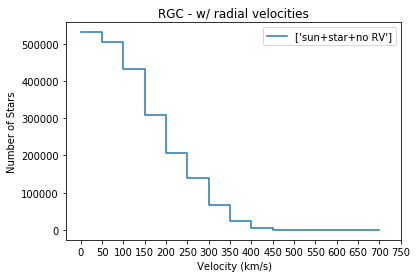

In [15]:
xdom = range(0,751,50)
n, bins = np.histogram(vf_list, bins = xdom)
plt.plot(bins[0:-1],n,linestyle='steps-post-', label = ['sun+star+no RV'])
plt.xticks(xdom)
plt.ylabel('Number of Stars')
plt.xlabel(' Velocity (km/s)')
plt.title('RGC - w/ radial velocities')
plt.legend()

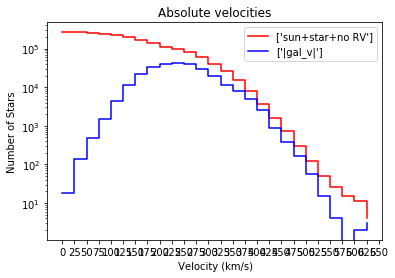

In [16]:
xdom = range(0,651,25)
xdom1 = range(0)
n, bins = np.histogram(vf_list, bins = xdom)
plt.plot(bins[0:-1],n,linestyle='steps-post-', label = ['sun+star+no RV'],color='r')
n, bins = np.histogram(gal_v, bins = xdom)
plt.plot(bins[0:-1],n,linestyle='steps-post-', label = ['|gal_v|'],color='b')
plt.xticks(xdom)
plt.ylabel('Number of Stars')
plt.xlabel(' Velocity (km/s)')
plt.title('Absolute velocities')
plt.legend()
plt.yscale('log')

In [17]:
plt.hexbin(gcdf.x,gcdf.y, cmap='inferno', bins='log')

NameError: name 'gcdf' is not defined